<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 4
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado - ou identifique-se cópia - o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: ` Gabriel Montagni Domingues Filho

`Número USP: ` 11800903

### Introdução:

Nesta lista de exercícios vamos estudar sobre a transformada de Fourier. Primeiramente vamos importar as bibliotecas que iremos utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### **Atenção**: os códigos abaixo são para fazer o download das imagens necessárias para a prática. EXECUTE-OS!

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/circulo.tif?raw=true", "circulo.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/faixahorizontal.tif?raw=true", "faixahorizontal.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/faixavertical.tif?raw=true", "faixavertical.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/hret_sim.tif?raw=true", "hret_sim.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/losango.tif?raw=true", "losango.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/parallelogram.tif?raw=true", "parallelogram.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/parallelogram_2.tif?raw=true", "parallelogram_2.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/quadrado.tif?raw=true", "quadrado.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/retangulohorizontal.tif?raw=true", "retangulohorizontal.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/retangulovertical.tif?raw=true", "retangulovertical.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/vret_sim.tif?raw=true", "vret_sim.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/pirate.tif?raw=true", "pirate.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Transformada de Fourier 2D (4.0/10.0)


A transformada de Fourier de uma função amostrada finita é uma função contínua, periódica e infinita. No domínio da frequência, o espectro se repete
em infinitos períodos. O cálculo  da transformada é feito em apenas um período.

Como ela é, em geral, complexa, pode ser expressa na forma polar:<br/><br/>

$$F(u,v) = |F(u,v)|e^{j\phi(u,v)}$$<br/>

sendo a magnitude (espectro de Fourier ou espectro de frequência):<br/><br/>

$$|F(u,v)| = [R^2(u,v) + I^2(u,v)]^{1/2}$$<br/>

e o ângulo de fase:<br/>

$$\phi(u,v) = arctan[I(u,v)/R(u,v)]$$<br/>

sendo $R$ a parte real e $I$ a parte imaginária de $F(u,v)$.<br/><br/>

As componentes do espectro de frequências determinam as amplitudes das senóides que se combinam para formar a imagem resultante. Uma grande amplitude em determinada frequência, implica em maior proeminência, na imagem, de uma senóide nessa frequência. O contrário também é válido.
As componentes de fase são menos intuitivas, mas são tão importantes quanto o espectro de frequências. A fase é uma medida do deslocamento das várias senóides em relação à sua origem - é um arranjo de ângulos que apresentam grande parte das informações sobre a localização dos objetos discerníveis na imagem.


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/brain_dft.png?raw=true" style="width:836px;height:266px;"></center>


<center><caption><b> Figura 1:</b> Espectro de frequência e ângulos de fase de uma imagem de ressonância magnética cerebral.</b></caption></center>
<caption><center> Referência: <a href="https://brain-development.org/ixi-dataset/">IXI Dataset</a>.</center></caption>

Funções de tranformada de Fourier utilizam algoritmos como *Fast Fourier Transform (FFT)* para o cálculo. Em python, a biblioteca Numpy fornece uma função pronta para a transformação considerando uma imagem (2D) [np.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html). Também oferece uma função para o deslocamento [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) - deixando o espectro centralizado (menores frequências no centro do espectro).

```python
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)
```

A função de transformada retorna uma matriz com números complexos, assim como esperado. Para cálculo da magnitude, a função [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html), em caso de números complexos $a+bj$, retorna o resultado conforme:

$$\sqrt{(a^2+b^2)}$$

Como as amplitudes do espectro variam em um range muito grande e não equalizado, é necessário ajustar o contraste para que seja possível visualizar em um plot. Por esse motivo, faz-se uma transformação logarítma.

Atenção: essa transformação é aplicada apenas para efeito de visualização. Soma-se um valor pequeno, por exemplo "1", às magnitudes encontradas, tal como no exemplo, pois intensidades de valor 0 gerariam erro quando o log fosse calculado.


1.1) Calcule a transformada de Fourier das imagens listadas abaixo. Para cada imagem, mostre o espectro de frequências (amplitude), com a devida correção logarítma e centralização. **Comente os resultados encontrados em cada imagem**.

* circulo.tif

* faixahorizontal.tif

* faixavertical.tif

* losango.tif

* quadrado.tif

* retangulovertical.tif

* retangulohorizontal.tif

* vret_sim.tif

* hret_sim.tif

* parallelogram.tif

* parallelogram_2.tif

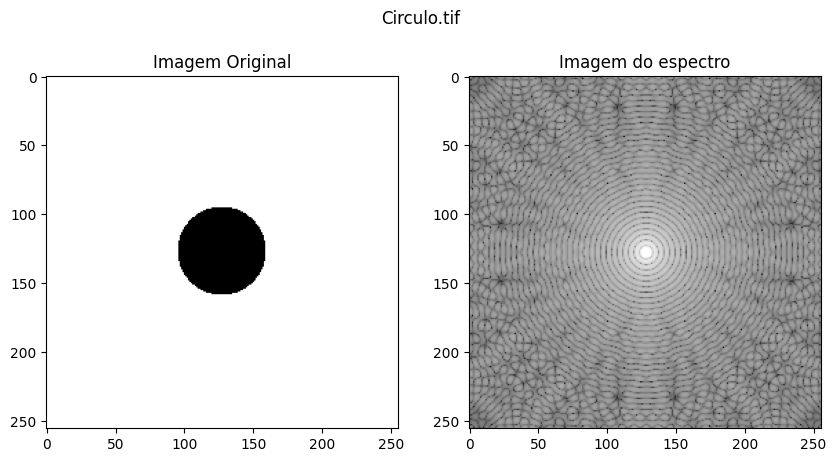

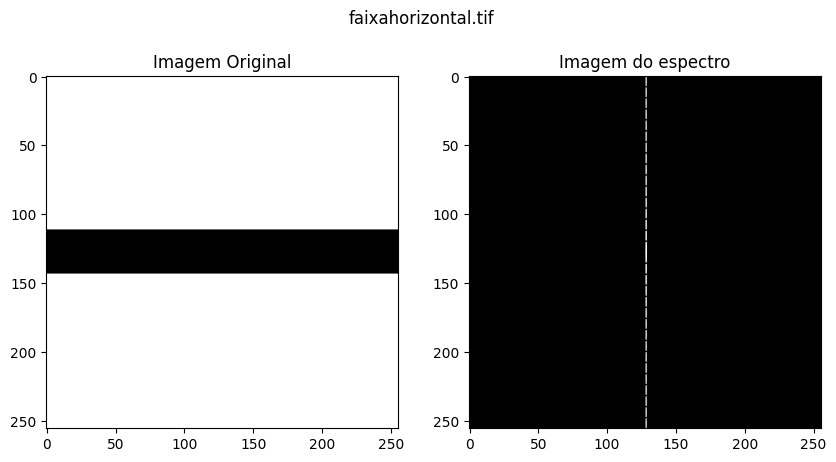

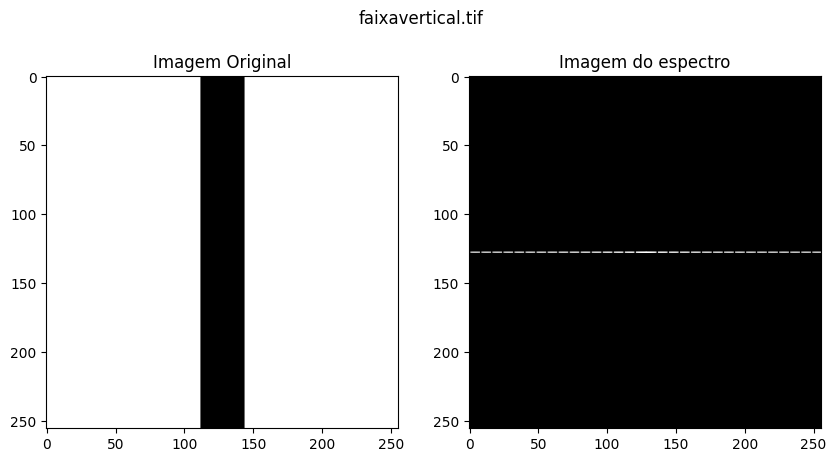

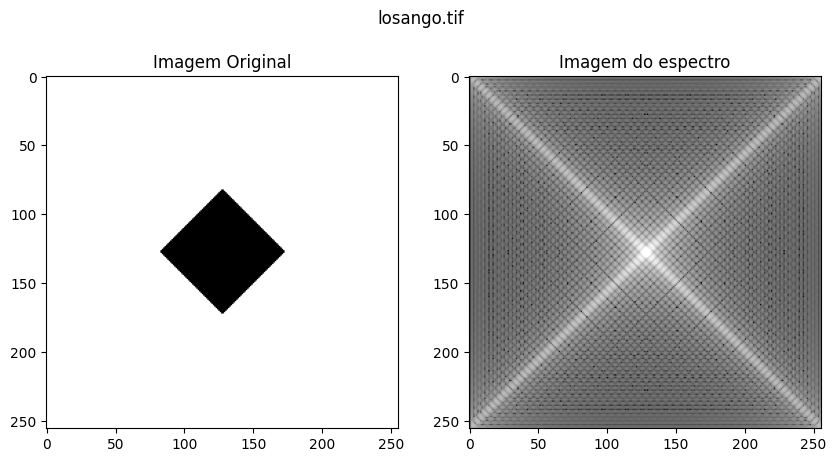

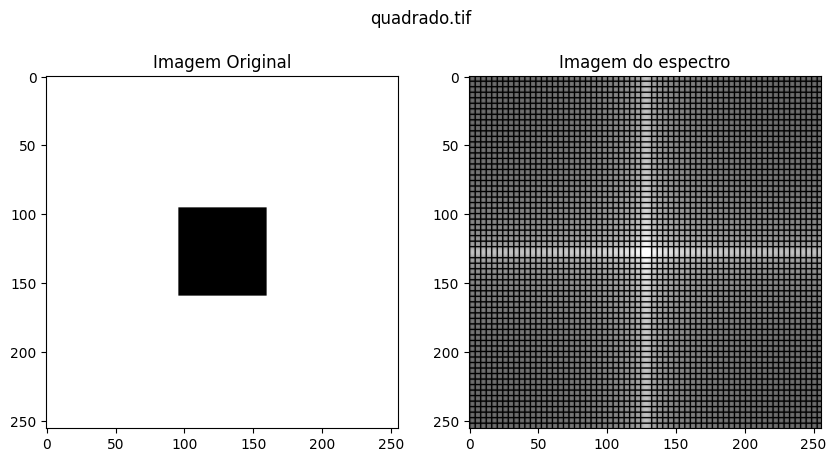

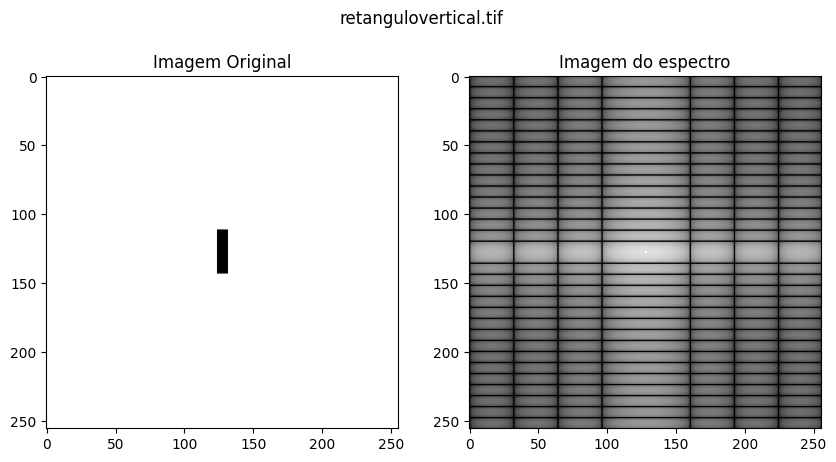

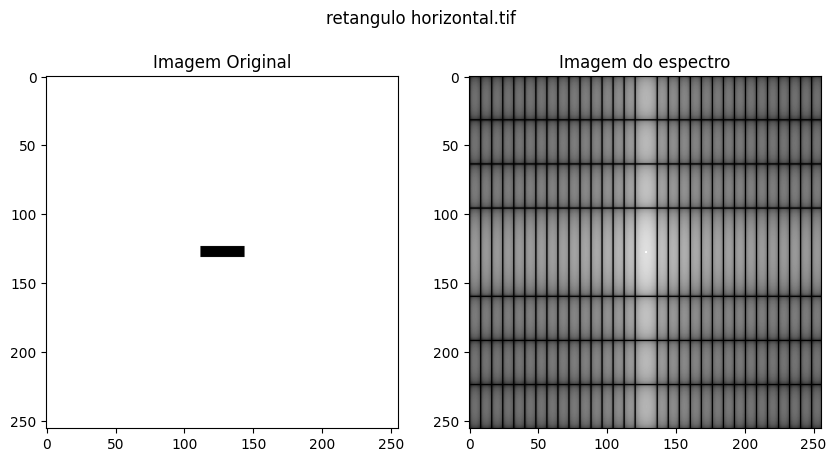

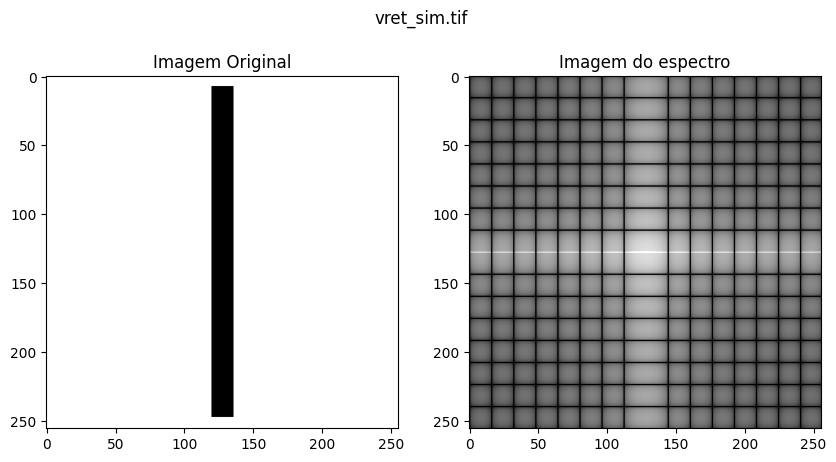

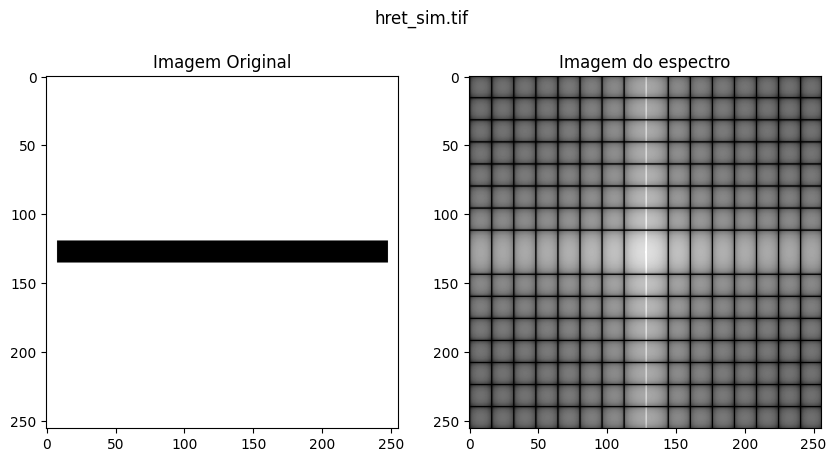

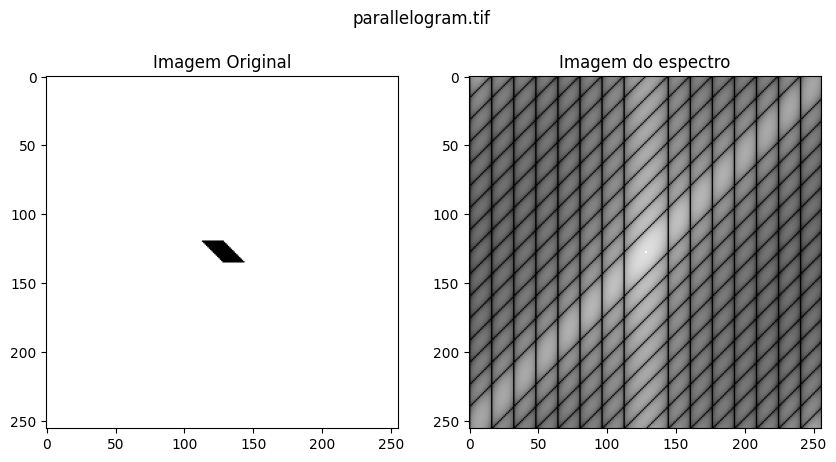

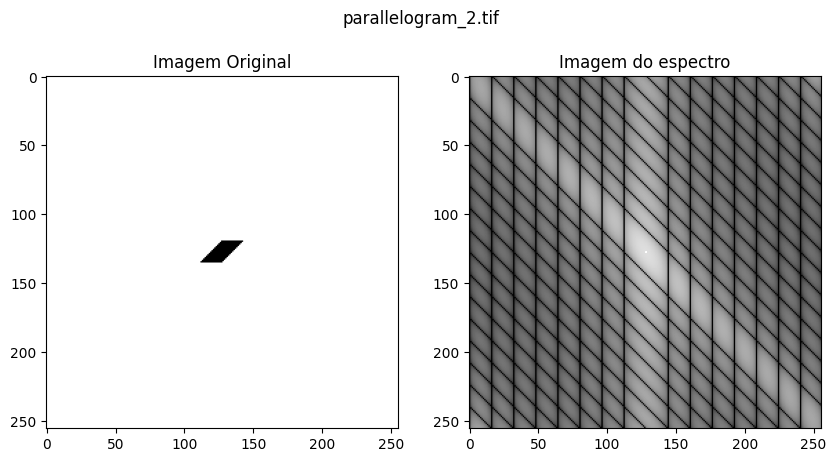

In [ ]:
## -- Seu código começa AQUI -- ##


#img1
img = cv.imread("circulo.tif", cv.IMREAD_GRAYSCALE).astype('float') #lê a imagem circulo.tif
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.) #calcula a transformada de fourier, centraliza o espectro, calcula o módulo e ajusta o contraste
plt.figure(figsize=(10,5)) #cria uma figura 10x5 e plota a imagem original e seu espectro
plt.suptitle("Circulo.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para faixahorizontal.tif
img = cv.imread("faixahorizontal.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("faixahorizontal.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para faixavertical.tif
img = cv.imread("faixavertical.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("faixavertical.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para losango.tif
img = cv.imread("losango.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("losango.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para quadrado.tif
img = cv.imread("quadrado.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("quadrado.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para retangulovertical.tif
img = cv.imread("retangulovertical.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("retangulovertical.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para retangulohorizontal.tif
img = cv.imread("retangulohorizontal.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("retangulo horizontal.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para vret_sim.tif
img = cv.imread("vret_sim.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("vret_sim.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para hret_sim.tif
img = cv.imread("hret_sim.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("hret_sim.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando paraparallelogram.tif
img = cv.imread("parallelogram.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("parallelogram.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")

#mesmo código da imagem 1, mas trocando para parallelogram_2.tif
img = cv.imread("parallelogram_2.tif", cv.IMREAD_GRAYSCALE).astype('float')
img_r = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))+1.)
plt.figure(figsize=(10,5))
plt.suptitle("parallelogram_2.tif")
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Imagem do espectro")
plt.imshow(img_r,'gray', vmin=0, vmax=255)
plt.show()
print("\n")
## -- Seu código termina AQUI -- ##

## COMENTÁRIO:
#Para a imagem 1, o espectro resulta em faixas em todas as difereções, visto que a imagem original é um círculo.
#Para a imagem 2, o espectro resulta em uma faixa somente na vertical, visto que o objeto original ocupa a faixa horizontal inteira (infinito) e seu espectro deve ser ao contrário, ou seja, na vertical somente.
#Para a imagem 3, o espectro resulta em uma faixa somente na horizontal, visto que o objeto original ocupa a faixa vertical inteira (infinito) e seu espectro deve ser ao contrário, ou seja, na horizontal somente.
#Para a imagem 4, o espectro resulta em faixas mais claras nas duas diagonais, pois o objeto original é um losango.
#Para a imagem 5, o espectro resulta em faixas mais claras centralizadas na horizontal e vertical, isso acontece pois a imagem original é um quadrado, a diferença para o losango é que uma é inclinada e a outra não.
#Para a imagem 6, temos um retângulo que não é infinito na vertical, seu espectro resulta em retângulos na horizontal, ou seja, ao contrário.
#Para a imagem 7, temos um retângulo que não é infinito na horizontal, ou seja, seu espectro resulta em retângulos na vertical.
#Para a imagem 8, temos um retângulo na vertical, quase infinito. Diferente das imagens 3 e 6, o espectro não resulta em apenas uma barra na horizontal (apesar de ter uma faixa bem clara na horizontal), e os retângulos horizontais são menores que os da imagem 6, como esperado.
#Para a imagem 9, temos um retângulo na horizontal, quase infinito. Difrente das imagens 2 e 7, o espectro não resulta em apenas uma barra na vertical (mas a faixa mais clara esta na vertical). Nesse caso, o resto do espectro, com excessão dessa faixa é igual o da imagem anterior.
#Para a imagem 10 e 11, temos paralelogramos inclinados em duas direções diferentes. Em cada espectro, aparecem paralelogramas inclinados na direção oposta.

### 2) Domínio de frequência x Domínio da imagem (4.0/10.0)

Não há perda de informação entre transformações de Fourier, seja no sentido "de ida" (domínio de imagem para frequência) ou no sentido "da volta" (domínio da frequência para imagem). Na Figura 2, vemos o espectro de frequências correspondente a uma função 2D. Repare que há uma proporcionalidade entre o pico do espectro e as dimensões A, T e Z da função.


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_04/Espectro_2D.PNG?raw=true" style="width:836px;height:266px;"></center>

<center><caption><b> Figura 2:</b> Uma função 2D e uma seção do seu espectro (fora de escala).</b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption>



A biblioteca numpy também fornece funções para a descentralização [np.fft.ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html) e caminho inverso - domínio da frequência para imagem [np.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html). No processo de transformação, pelo algoritmo utilizado, restam alguns valores complexos (insignificantes), sendo necessário calcular o valor absoluto do resultado da transformada inversa para que seja possível visualizar a imagem. Veja o exemplo a seguir:

```python
ifshift = np.fft.ifftshift(f)
img = np.abs(np.fft.ifft2(ifshift))
```

2.1) Leia a imagem 'pirate.tif' e calcule o seu negativo.
Em seguida,

*   Calcule a diferença das médias das imagens (original e negativo). Qual o valor obtido?
*   Calcule o espectro de frequências da imagem original e do negativo. Centralize os espectros e guarde os valores absolutos calculados, pois serão importantes para o próximo exercício.
*   Faça o ajuste logarítmo e mostre as imagens e seus espectros correspondentes.



O valor da diferença das médias é:  31.72014617919922


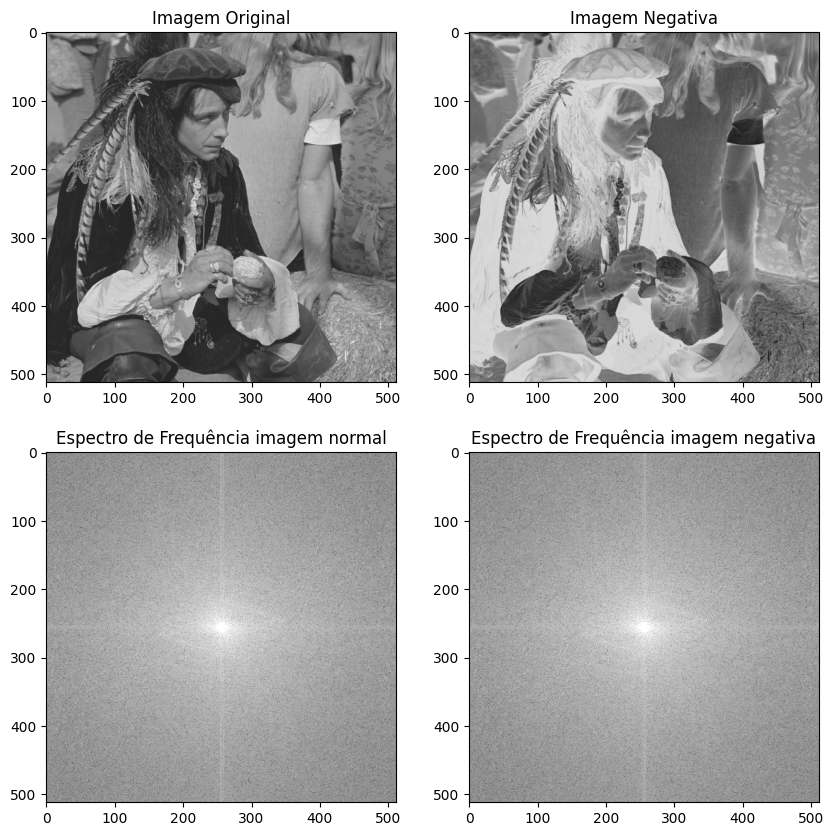

In [ ]:
## -- Seu código começa AQUI -- ##
img = cv.imread("pirate.tif", cv.IMREAD_GRAYSCALE).astype('float') #ler a imagem
img_negative = 255 - img #calcular a imagem negativa

f = np.fft.fft2(img) #calcula a transformada da imagem original
fshift = np.fft.fftshift(f) #centraliza o espectro
abs1 = np.abs(fshift) #calcula o módulo do espectro e guarda na variavel abs1
magnitude_spectrum = 20*np.log(abs1+1.) #ajusta o contraste

f_r = np.fft.fft2(img_negative) #calcula a transformada da imagem negativa
fshift_r = np.fft.fftshift(f_r) #centraliza o espectro
abs2 = np.abs(fshift_r) #calcula o módulo do espectro e guarda na variavel abs2
magnitude_spectrum_r = 20*np.log(abs2+1.) #ajusta o contraste

media = np.mean(img_negative) - np.mean(img) #calculo da media das imagens
print("O valor da diferença das médias é: ", media) #print do valor da média


#plot das 4 imagens: imagem original, negativa, espectro de frequência da original e negativa
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.title("Imagem Negativa")
plt.imshow(img_negative,'gray', vmin=0, vmax=255)
plt.subplot(2,2,3)
plt.title("Espectro de Frequência imagem normal")
plt.imshow(magnitude_spectrum,'gray', vmin=0, vmax=255)
plt.subplot(2,2,4)
plt.title("Espectro de Frequência imagem negativa")
plt.imshow(magnitude_spectrum_r,'gray', vmin=0, vmax=255)
plt.show()

## -- Seu código termina AQUI -- ##

2.2) Faça a diferença entre as magnitudes dos espectros armazenadas no exercício anterior - referentes à imagem original e seu negativo. Aplique o ajuste logarítmo e mostre o espectro resultante. O resultado deve ser um único ponto central. O que ele significa? Qual seu valor?

Dicas:
1. Mostre o espectro com figsize=(15,15) para melhor visualização.
2. Lembre-se de considerar a transformação logarítma apenas para visualização.

O valor é:  8315246.0


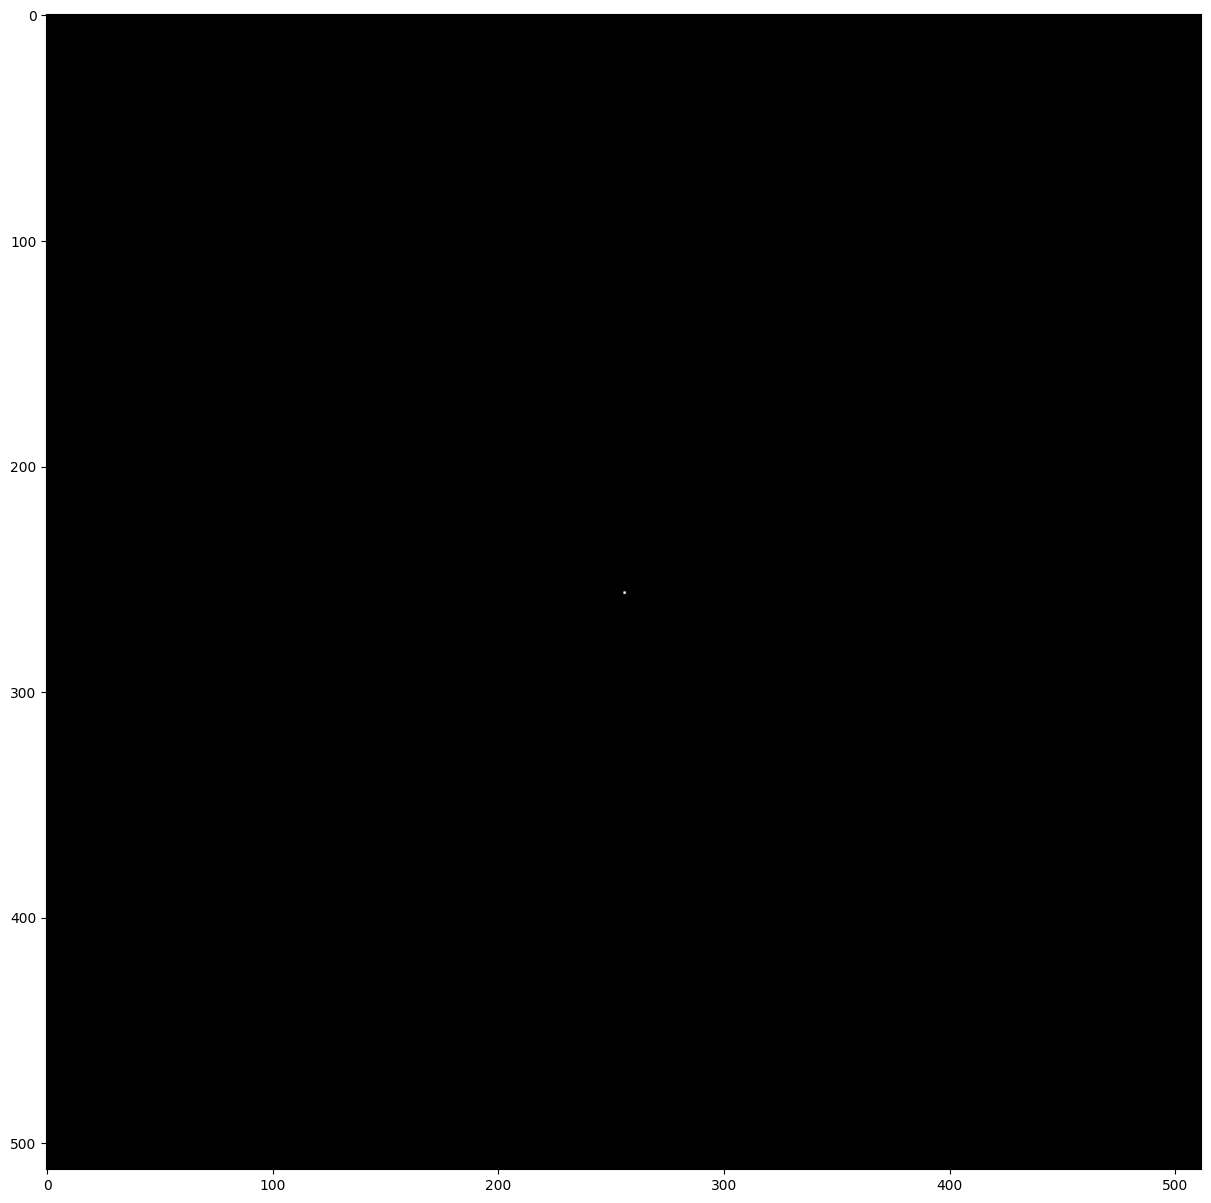

In [ ]:
## -- Seu código começa AQUI -- ##
mag = (abs2-abs1) #diferença dos valores absolutos salvos no item anteior
print("O valor é: ",mag.max()) #O branco na imagem é dado pelo valor máximo
espectro = 20*np.log(mag+1.) #ajusta o contraste
#cria uma figura 15x15
plt.figure(figsize=(15,15))
plt.imshow(espectro,'gray', vmin=0, vmax=255)
plt.show()
## -- Seu código termina AQUI -- ##

#O valor do ponto central é  8315246.0 antes da transformação logaritmica. Como foi feita a transformada de fourier de um valor que é diferença dos valores médios, temos a transformada de uma imagem quadrada bem grande, que é apenas um pixel (um ponto).

2.3) Considere o espectro de diferença do exercício anterior e realize a transformada inversa. Calcule valor médio, máximo e mínimo da imagem obtida. O que representa essa imagem? **Compare com os valores obtidos nos exercícios 2.1 e 2.2 e comente os resultados.**

espectro_max: 31.72014617919922
espectro_min: 31.72014617919922
espectro_médio: 31.72014617919922


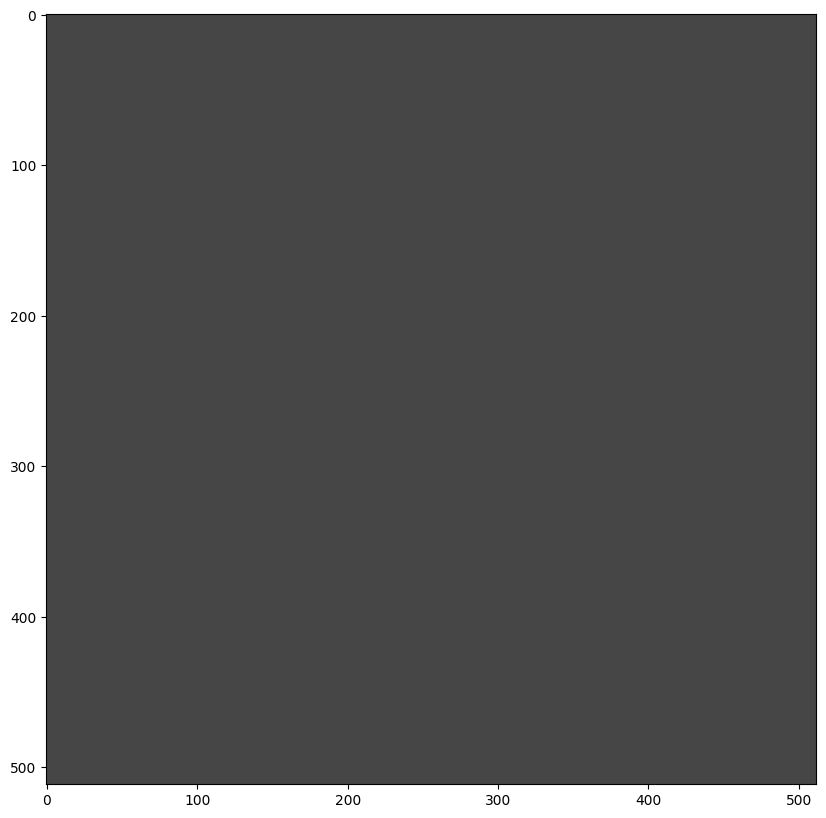

In [ ]:
## -- Seu código começa AQUI -- ##
ifshift = np.fft.ifftshift(mag) #calcula a transformada inversa da diferença da magnitude
img_new = np.abs(np.fft.ifft2(ifshift))#A imagem é dada pelo vaor abosulo da trasnformada inversa após a descentralizaçao

print("espectro_max:", img_new.max()) #mostra o valor máximo
print("espectro_min:", img_new.min()) #mostra o valor mínimo
print("espectro_médio:", img_new.mean()) #mostra o valor médio

espectro2 = 20*np.log(img_new+1.)

#motra a imagem em uma janela 10x10
plt.figure(figsize=(10,10))
plt.imshow(espectro2,'gray', vmin=0, vmax=255)
plt.show()
## -- Seu código termina AQUI -- ##
#Se a tranformada de fourier resulta em um ponto (2.2), quer dizer que a imagem original tem apenas um valor ao longo dos pixels, por isso, ao realizar a transformada inversa é obtida uma imagem de um tom apenas. Isso é evidenciado pelo valor mínimo, máximo e média que são todos iguais .
#Repare que nesse caso, esses valores são iguais a diferença das médias das imagens, como era esperado.

### 3) Transformada inversa de Fourier 2D (Nota: 2.0/10.0)


3.1) Execute o código abaixo. Inclua comentários em cada linha do programa e explique o que ele executa.



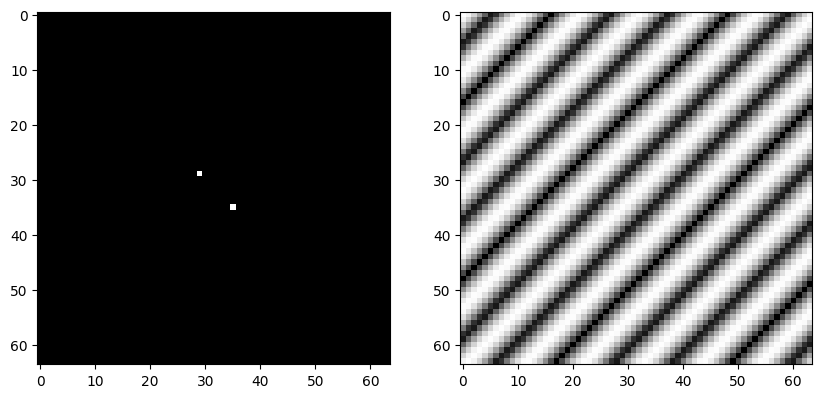

In [ ]:
H = np.zeros((64,64)) #cria uma matriz 64x64
M,N = H.shape #M e N recebem as dimensões da matriz
cx = int(M/2) #define o valor central de x, que é M/2
cy = int(N/2) #define o valor centrar de y, que é N/2

freq = 3 #define a frequência

H[cx-freq,cy-freq] = 1 #Nas coordenadas, cx-freq e cy-freq o valor 1 é atribuido para 1, formando manchas brancas
H[cx+freq,cy+freq] = 1#Nas coordenadas, cx+freq e cy+freq o valor 1 é atribuido para 1, formando manchas brancas

f = np.fft.ifft2(np.fft.ifftshift(H)) #calcula a transformada inversa de fourier da matriz H, após desclocar as frequências
f = np.abs(f) #calcula o valor absoluto
f = np.uint8((255*(f-f.min()))/(f.max()-f.min())) #normaliza os valores entre 0 e 255 e salva eles como uint8

plt.figure(figsize=(10,5)) #cria uma figura com dimensões 10,5
plt.subplot(1,2,1) #cria um subplot e prepara uma imagem para ser colocada na primeira posição
plt.imshow(H,'gray') #plot da imagem H
plt.subplot(1,2,2) #coloca a outra imagem na segunda posição
plt.imshow(f,'gray') #plot da imagem f
plt.show() # mostra as imagens

#COMENTÁRIO:
#O código cria uma imagem preta com 2 pontos brancos definidos pela frequência. E depois calcula o espectro de fourier da imagem, apresentando o padrão senoidal
#dado pela frequência definida.

3.2) Varie a frequência (variável 'freq') gerando pelo menos 2 novos padrões senoidais. **Comente os resultados.**

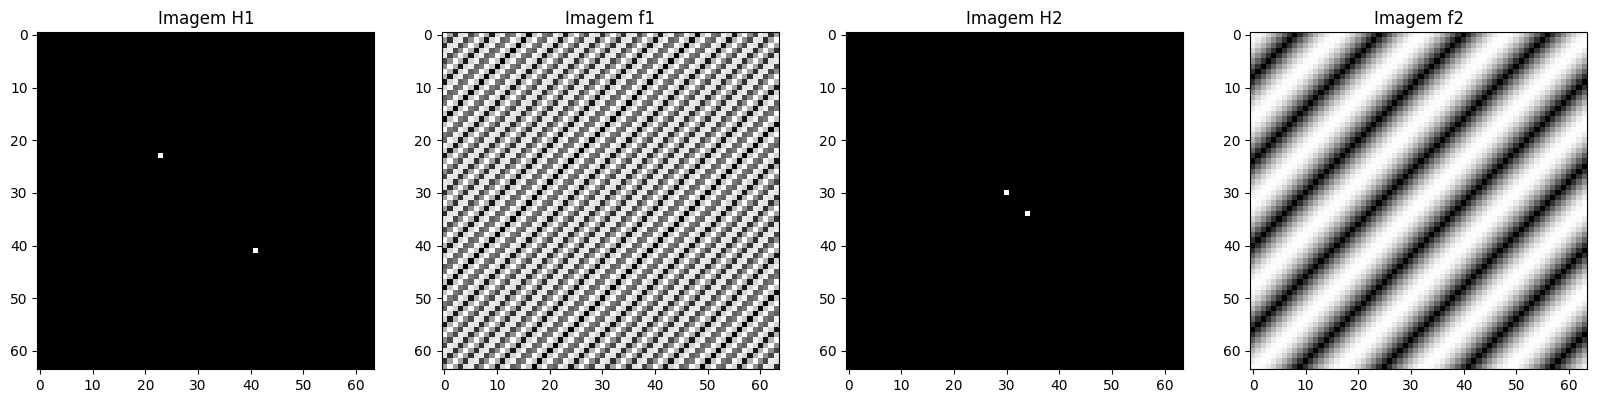

In [ ]:
## -- Seu código começa AQUI -- ##
def espectro_freq(freq):
  H = np.zeros((64,64)) #cria uma matriz 64x64
  M,N = H.shape #M e N recebem as dimensões da matriz
  cx = int(M/2) #define o valor central de x, que é M/2
  cy = int(N/2) #define o valor centrar de y, que é N/2
  H[cx-freq,cy-freq] = 1 #Nas coordenadas, cx-freq e cy-freq o valor 1 é atribuido para 1, formando manchas brancas
  H[cx+freq,cy+freq] = 1#Nas coordenadas, cx+freq e cy+freq o valor 1 é atribuido para 1, formando manchas brancas
  f = np.fft.ifft2(np.fft.ifftshift(H)) #calcula a transformada inversa de fourier da matriz H, após desclocar as frequências
  f = np.abs(f) #calcula o valor absoluto
  f = np.uint8((255*(f-f.min()))/(f.max()-f.min())) #normaliza os valores entre 0 e 255 e salva eles como uint8
  return H,f

H1,f1 = espectro_freq(9)
H2,f2 = espectro_freq(2)

plt.figure(figsize=(20,5)) #cria uma figura com dimensões 10,5
plt.subplot(1,4,1) #cria um subplot e prepara uma imagem para ser colocada na primeira posição
plt.title("Imagem H1")
plt.imshow(H1,'gray') #plot da imagem H1
plt.subplot(1,4,2) #coloca a outra imagem na segunda posição
plt.title("Imagem f1")
plt.imshow(f1,'gray') #plot da imagem f1
plt.subplot(1,4,3) #cria um subplot e prepara uma imagem para ser colocada na primeira posição
plt.title("Imagem H2")
plt.imshow(H2,'gray') #plot da imagem H2
plt.subplot(1,4,4) #coloca a outra imagem na segunda posição
plt.title("Imagem f2")
plt.imshow(f2,'gray') #plot da imagem f2
plt.show() # mostra as imagens

## -- Seu código termina AQUI -- ##

#COMENTÁRIO: A imagem H1 e f1 foram definidas para uma frequência=9, já em H2, a frequência foi definida como 2. Como esperado, para a maior frequência, os pontos ficaram
#mais afastados na imagem H, e na imagem F, na qual a distância depende de 1/f os pontos ficaram mais próximos. Comparado ao item anterior, a imagem f1 teve o padrão
#senoidal mais próximo e imagem f2 mais afastado.